In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [10]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
column_names = train_data.columns
for column in column_names:
    print(column + ' - ' + str(train_data[column].isnull().sum()))

PassengerId - 0
Survived - 0
Pclass - 0
Name - 0
Sex - 0
Age - 177
SibSp - 0
Parch - 0
Ticket - 0
Fare - 0
Cabin - 687
Embarked - 2


In [12]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Text(0, 0.5, 'Jumlah Penumpang')

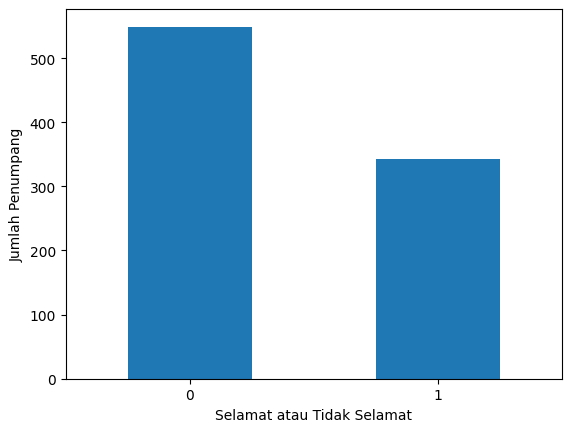

In [14]:
dt = train_data['Survived'].value_counts()
plt = dt.plot(kind = 'bar', rot=0)
plt.set_xlabel('Selamat atau Tidak Selamat')
plt.set_ylabel('Jumlah Penumpang')

Text(0, 0.5, 'Probabilitas Selamat')

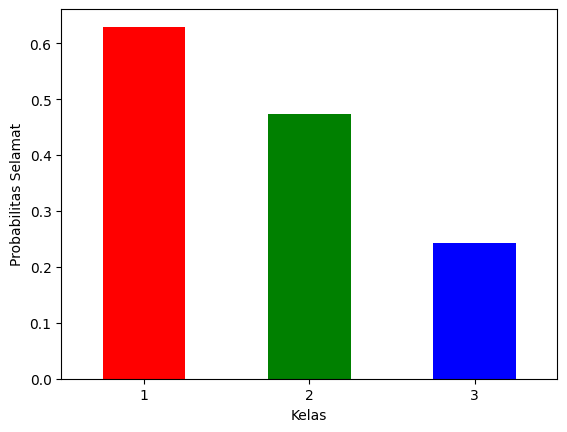

In [15]:
dt = train_data[['Pclass', 'Survived']].groupby(
    'Pclass').mean().Survived
plt = dt.plot(kind='bar', rot=0, color=['red', 'green', 'blue'])
plt.set_xlabel('Kelas')
plt.set_ylabel('Probabilitas Selamat')

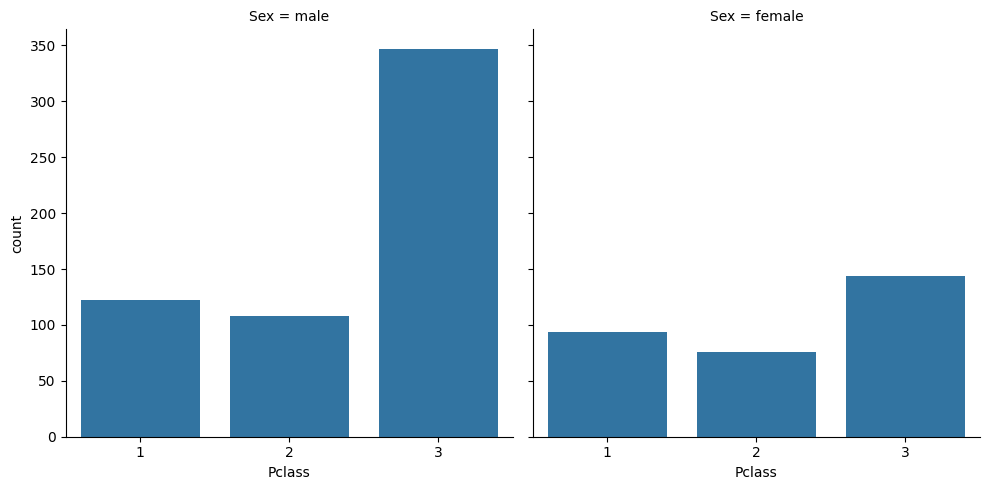

In [22]:
sns.catplot(x='Pclass', col='Sex', data=train_data, kind='count')

In [23]:
train_data = train_data.drop(columns=['Ticket', 'PassengerId', 'Cabin'])
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [27]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [29]:
train_data['Sex'] = train_data['Sex'].map({'male':0, 'female':1})
train_data['Embarked'] = train_data['Embarked'].map({'C':0, 'Q':1, 'S':2})
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",NaN,22.0,1,0,7.2500,NaN,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,71.2833,NaN,2
2,1,3,"Heikkinen, Miss. Laina",NaN,26.0,0,0,7.9250,NaN,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,0,53.1000,NaN,2
4,0,3,"Allen, Mr. William Henry",NaN,35.0,0,0,8.0500,NaN,1


In [32]:
train_data['Title'] = train_data['Name'].str.extract('([A-Za-z]+)\\.', expand=False)
train_data = train_data.drop(columns='Name')
train_data.head()

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Dell\AppData\Local\Temp\ipykernel_2264\3092265997.py:1: SyntaxWarning: invalid escape sequence '\.'
  train_data['Title'] = train_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
C:\Users\Dell\AppData\Local\Temp\ipykernel_2264\3092265997.py:1: SyntaxWarning: invalid escape sequence '\.'
  train_data['Title'] = train_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)


KeyError: 'Name'

<Axes: xlabel='Title'>

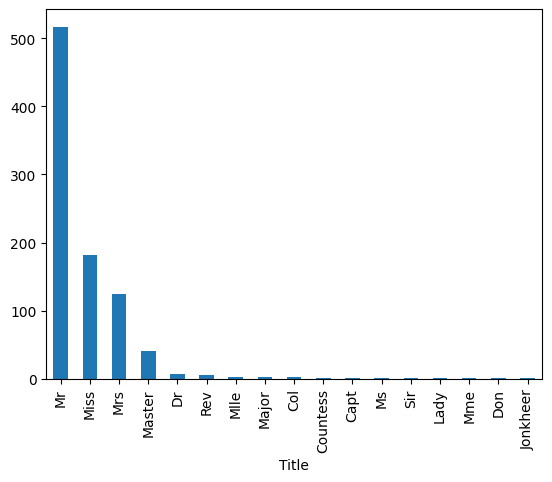

In [33]:
train_data['Title'].value_counts().plot(kind='bar')

In [35]:
train_data['Title'] = train_data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')
train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')

Text(0, 0.5, 'Jumlah Penumpang')

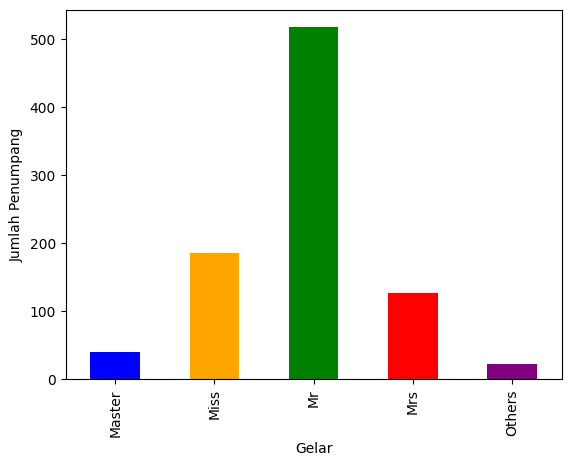

In [36]:
plt = train_data['Title'].value_counts().sort_index().plot(kind = 'bar', color = ['blue', 'orange', 'green', 'red', 'purple'])
plt.set_xlabel('Gelar')
plt.set_ylabel('Jumlah Penumpang')

In [41]:
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = train_data[numeric_columns].corr()


<Axes: >

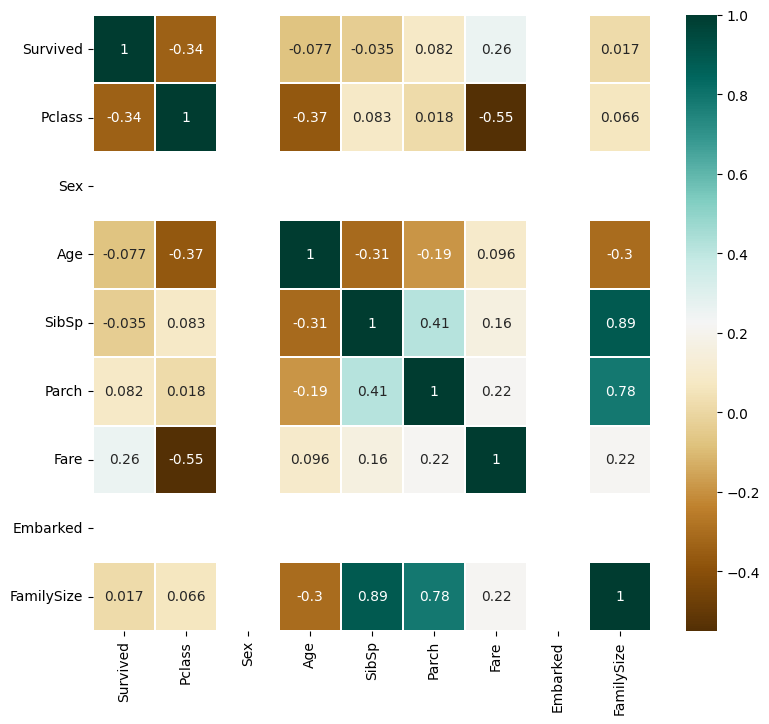

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 8))
sns.heatmap(data = corr_matrix, cmap='BrBG', annot=True, linewidths=0.2)

In [43]:
missing = train_data['Embarked'].isnull().sum()
print("Jumlah data kosong pada atribut Embarked: ", missing)

Jumlah data kosong pada atribut Embarked:  891


IndexError: index 0 is out of bounds for axis 0 with size 0

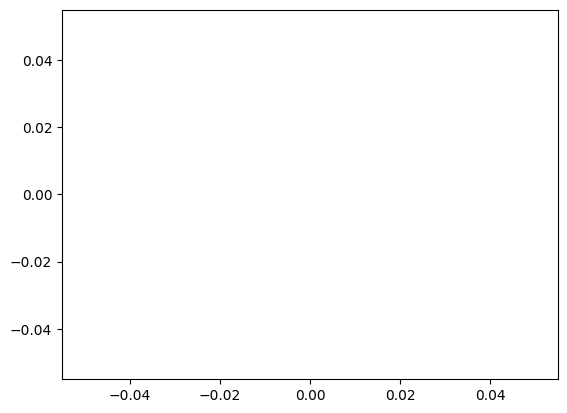

In [44]:
plt = train_data['Embarked'].value_counts().sort_index().plot(kind='bar', color=['blue', 'orange', 'green'], rot=0)
plt.set_xlabel('Embarked')
plt.set_ylabel('Jumlah Penumpang')

In [45]:
train_data['Embarked'] = train_data['Embarked'].fillna(2)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,NaN,22.0,1,0,7.2500,2.0,2,Mr
1,1,1,NaN,38.0,1,0,71.2833,2.0,2,Mrs
2,1,3,NaN,26.0,0,0,7.9250,2.0,1,Miss
3,1,1,NaN,35.0,1,0,53.1000,2.0,2,Mrs
4,0,3,NaN,35.0,0,0,8.0500,2.0,1,Mr


In [47]:
NaN_indexes = train_data['Age'][train_data['Age'].isnull()].index
print(NaN_indexes)

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)


In [50]:
for i in NaN_indexes:
    pred_age train_data['Age'][((train_data.SibSp == train_data.iloc[i]["SibSp"]) & (train_data.Parch == train_data.iloc[i]["Parch"]) & (train_data.Pclass == train_data.iloc[i]["Pclass"]))].median()
    if np.isnan(pred_age):
        train_data['Age'].iloc[i] = train_data['Age'].median()
    else:
        train_data['Age'].iloc[i] = pred_age

for i in NaN_indexes:
    pred_age = train_data['Age'][((train_data.SibSp == train_data.iloc[i]["SibSp"]) & (train_data.Parch == train_data.iloc[i]["Parch"]) & (train_data.Pclass == train_data.iloc[i]["Pclass"]))].median()
    if np.isnan(pred_age):
        train_data['Age'].iloc[i] = train_data['Age'].median()
    else:
        train_data['Age'].iloc[i] = pred_age


SyntaxError: invalid syntax (1456780703.py, line 2)